# 1.1 - Intro Machine Learning


![venn_ml](images/venn_ml.png)

![ext_sklearn](images/ext_sklearn.jpeg)

![sklearn](images/sklearn.png)



### WorkFlow

+ Obtener datos
+ Definir objetivo
+ Limpieza de datos (unidades, outliers, one-hot, etc..)
+ Definir modelo (regresión, clasificación, ...)
+ Entrenar (hiperparámetros, validación, ...) (**)
+ Predecir (testear)
+ Evaluar
+ Si hay mucho error volver a (**)

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np


import pylab as plt
%matplotlib inline

In [2]:
# obtener datos

census=pd.read_csv('../data/census.csv')

census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3220 non-null   int64  
 1   State            3220 non-null   object 
 2   County           3220 non-null   object 
 3   TotalPop         3220 non-null   int64  
 4   Men              3220 non-null   int64  
 5   Women            3220 non-null   int64  
 6   Hispanic         3220 non-null   float64
 7   White            3220 non-null   float64
 8   Black            3220 non-null   float64
 9   Native           3220 non-null   float64
 10  Asian            3220 non-null   float64
 11  Pacific          3220 non-null   float64
 12  Citizen          3220 non-null   int64  
 13  Income           3219 non-null   float64
 14  IncomeErr        3219 non-null   float64
 15  IncomePerCap     3220 non-null   int64  
 16  IncomePerCapErr  3220 non-null   int64  
 17  Poverty       

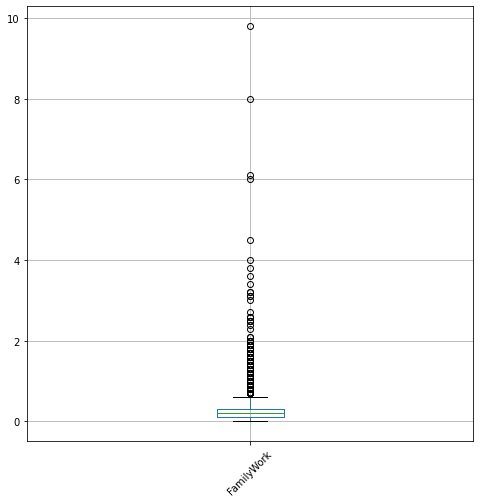

In [5]:
# outliers (3*iqr)

plt.figure(figsize=(8,8))

census.boxplot(column=['FamilyWork'])

plt.xticks(rotation=45);

In [6]:
q1=np.percentile(census.FamilyWork, 25)
q3=np.percentile(census.FamilyWork, 75)

In [7]:
iqr=q3-q1

upper=q3 + 3*iqr
lower=q1 - 3*iqr

In [8]:
len(census[census.FamilyWork < lower])

0

In [9]:
census=census[census.FamilyWork < upper]
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


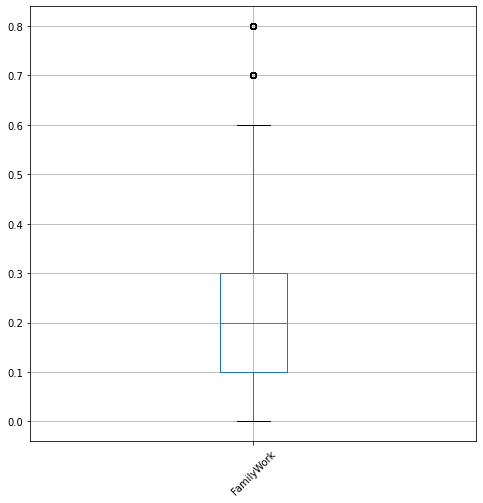

In [10]:
plt.figure(figsize=(8,8))

census.boxplot(column=['FamilyWork'])

plt.xticks(rotation=45);

In [11]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3022 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3022 non-null   int64  
 1   State            3022 non-null   object 
 2   County           3022 non-null   object 
 3   TotalPop         3022 non-null   int64  
 4   Men              3022 non-null   int64  
 5   Women            3022 non-null   int64  
 6   Hispanic         3022 non-null   float64
 7   White            3022 non-null   float64
 8   Black            3022 non-null   float64
 9   Native           3022 non-null   float64
 10  Asian            3022 non-null   float64
 11  Pacific          3022 non-null   float64
 12  Citizen          3022 non-null   int64  
 13  Income           3021 non-null   float64
 14  IncomeErr        3021 non-null   float64
 15  IncomePerCap     3022 non-null   int64  
 16  IncomePerCapErr  3022 non-null   int64  
 17  Poverty       

In [12]:
# reescalado [0,1]

def escala(x):
    return (x/100).round(3)

In [13]:
conversion=['Hispanic','White', 'Black', 'Native',
            'Asian', 'Pacific', 'Poverty', 'ChildPoverty',
            'Service', 'Office']

In [14]:
n_columnas=[x+'Rate' for x in conversion]

census[n_columnas]=census[conversion].apply(escala)

census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ServiceRate,OfficeRate
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.026,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.170,0.242
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,0.045,0.831,0.095,0.006,0.007,0.0,0.134,0.192,0.177,0.271
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,0.046,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.161,0.231
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.022,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.179,0.178
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.086,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.141,0.239


In [15]:
# normalizacion

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [16]:
census['TotalPopScaled']=RobustScaler().fit_transform(census.TotalPop.values.reshape(-1, 1))

census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ServiceRate,OfficeRate,TotalPopScaled
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.170,0.242,0.446361
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,0.831,0.095,0.006,0.007,0.0,0.134,0.192,0.177,0.271,2.790117
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.161,0.231,-0.027567
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.179,0.178,-0.100075
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.141,0.239,0.488059


In [17]:
# one-hot encoding, get dummies

len(census.State.value_counts())

52

In [18]:
state=pd.get_dummies(census.State, drop_first=True)

census=pd.concat([census, state], axis=1)

census.tail()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,...,0,0,0,0,0,0,0,0,0,0
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3219,72153,Puerto Rico,Yauco,39474,19047,20427,99.5,0.5,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [20]:
LabelEncoder().fit_transform(census.State)[30:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
OrdinalEncoder().fit_transform(census.State.values.reshape(1, -1))[30:40]

array([], shape=(0, 3022), dtype=float64)

In [22]:
census.CensusId.unique()

array([ 1001,  1003,  1005, ..., 72149, 72151, 72153])

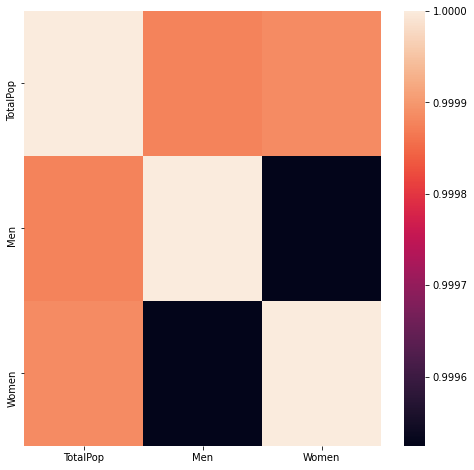

In [23]:
# colinealidad

import seaborn as sns

plt.figure(figsize=(8,8))

sns.heatmap(census[['TotalPop', 'Men', 'Women']].corr());

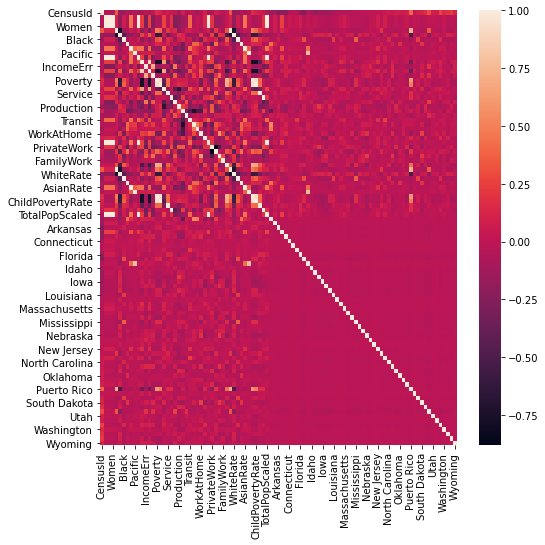

In [24]:
plt.figure(figsize=(8,8))

sns.heatmap(census.corr());

In [25]:
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0,0,0,0,0,0,0,0,0,0
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,0,0,0,0,0,0,0,0,0,0
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,0,0,0,0,0,0,0,0,0,0
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0,0,0,0,0,0,0,0,0,0
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# train-test-split

from sklearn.model_selection import train_test_split as tts

In [27]:
# split 80-20

train, test = tts(census, test_size=0.2, train_size=0.8, random_state=42)

In [28]:
census.shape

(3022, 99)

In [29]:
train.shape

(2417, 99)

In [30]:
test.shape

(605, 99)

In [31]:
census=census.dropna()

In [32]:
X = census.drop(columns=['TotalPop', 'CensusId', 'Men', 'Women',
                        'Hispanic','White', 'Black', 'Native',
                        'Asian', 'Pacific', 'Poverty', 'ChildPoverty',
                        'Service', 'Office', 'TotalPopScaled', 'PovertyRate',
                        'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr'])._get_numeric_data()  # datos

y = census.PovertyRate  # objetivo

In [33]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(2416, 77)

In [35]:
X_test.shape

(604, 77)

In [36]:
y_train.shape

(2416,)

In [37]:
y_test.shape

(604,)

**Modelo**

In [38]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score

In [46]:
linreg=LinReg(fit_intercept=True)  # inicia la clase...

linreg.fit(X_train, y_train)  # y entrena

LinearRegression()

In [47]:
linreg.intercept_

-0.018231455590766776

In [41]:
y_pred=linreg.predict(X_test)  # prediccion

y_pred[:10]

array([0.35457305, 0.0788142 , 0.1338142 , 0.2279021 , 0.20966932,
       0.17077103, 0.08957154, 0.13548724, 0.17699718, 0.15775907])

In [42]:
y_pred.shape

(604,)

In [43]:
y_pred.shape==y_test.shape

True

In [44]:
r2_score(y_pred, y_test)

0.933488258943071

In [45]:
X.columns

Index(['Citizen', 'Professional', 'Construction', 'Production', 'Drive',
       'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment', 'HispanicRate', 'WhiteRate', 'BlackRate',
       'NativeRate', 'AsianRate', 'PacificRate', 'ChildPovertyRate',
       'ServiceRate', 'OfficeRate', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Da

### Feature Extraction and Engineering

In [48]:
import zipfile

In [50]:
zf=zipfile.ZipFile('../data/mahindra.zip')

df=pd.read_csv(zf.open('test.csv'), nrows=1e5)

df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [51]:
df.shape

(100000, 23)

In [52]:
# optimizar memoria

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   reservation_id            100000 non-null  object 
 1   booking_date              100000 non-null  object 
 2   checkin_date              100000 non-null  object 
 3   checkout_date             100000 non-null  object 
 4   channel_code              100000 non-null  int64  
 5   main_product_code         100000 non-null  int64  
 6   numberofadults            100000 non-null  int64  
 7   numberofchildren          100000 non-null  int64  
 8   persontravellingid        100000 non-null  int64  
 9   resort_region_code        100000 non-null  int64  
 10  resort_type_code          100000 non-null  int64  
 11  room_type_booked_code     100000 non-null  int64  
 12  roomnights                100000 non-null  int64  
 13  season_holidayed_code     99975 non-null   fl

In [54]:
for e in df.select_dtypes('object').columns:
    
    df[e]=df[e].astype('category')


df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   reservation_id            100000 non-null  category
 1   booking_date              100000 non-null  category
 2   checkin_date              100000 non-null  category
 3   checkout_date             100000 non-null  category
 4   channel_code              100000 non-null  int64   
 5   main_product_code         100000 non-null  int64   
 6   numberofadults            100000 non-null  int64   
 7   numberofchildren          100000 non-null  int64   
 8   persontravellingid        100000 non-null  int64   
 9   resort_region_code        100000 non-null  int64   
 10  resort_type_code          100000 non-null  int64   
 11  room_type_booked_code     100000 non-null  int64   
 12  roomnights                100000 non-null  int64   
 13  season_holidayed_code     9997

In [57]:
for e in df.select_dtypes('integer').columns:
    
    df[e]=pd.to_numeric(df[e], downcast='integer')


df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   reservation_id            100000 non-null  category
 1   booking_date              100000 non-null  category
 2   checkin_date              100000 non-null  category
 3   checkout_date             100000 non-null  category
 4   channel_code              100000 non-null  int8    
 5   main_product_code         100000 non-null  int8    
 6   numberofadults            100000 non-null  int8    
 7   numberofchildren          100000 non-null  int8    
 8   persontravellingid        100000 non-null  int16   
 9   resort_region_code        100000 non-null  int8    
 10  resort_type_code          100000 non-null  int8    
 11  room_type_booked_code     100000 non-null  int8    
 12  roomnights                100000 non-null  int8    
 13  season_holidayed_code     9997

In [58]:
for e in df.select_dtypes('float').columns:
    
    df[e]=pd.to_numeric(df[e], downcast='float')


df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   reservation_id            100000 non-null  category
 1   booking_date              100000 non-null  category
 2   checkin_date              100000 non-null  category
 3   checkout_date             100000 non-null  category
 4   channel_code              100000 non-null  int8    
 5   main_product_code         100000 non-null  int8    
 6   numberofadults            100000 non-null  int8    
 7   numberofchildren          100000 non-null  int8    
 8   persontravellingid        100000 non-null  int16   
 9   resort_region_code        100000 non-null  int8    
 10  resort_type_code          100000 non-null  int8    
 11  room_type_booked_code     100000 non-null  int8    
 12  roomnights                100000 non-null  int8    
 13  season_holidayed_code     9997

**Binning**

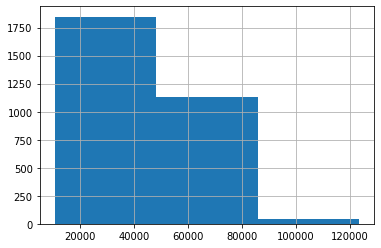

In [68]:
census.Income.hist(bins=3);

In [70]:
pd.cut(census.Income, 3).value_counts()

(10386.046, 48150.333]    1847
(48150.333, 85801.667]    1132
(85801.667, 123453.0]       41
Name: Income, dtype: int64

In [73]:
pd.qcut(census.Income, [0, 1/3, 2/3, 1]).value_counts()

(10498.999, 40731.333]    1007
(49809.667, 123453.0]     1007
(40731.333, 49809.667]    1006
Name: Income, dtype: int64

In [78]:
census['A']=np.where(pd.qcut(census.Income, [0, 1/3, 2/3, 1]).cat.codes==0 , 0, np.where(pd.qcut(census.Income, [0, 1/3, 2/3, 1]).cat.codes==1, 1, 2))

census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,A
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0,0,0,0,0,0,0,0,0,2
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,0,0,0,0,0,0,0,0,0,2
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,0,0,0,0,0,0,0,0,0,0
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0,0,0,0,0,0,0,0,0,0
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0,0,0,0,0,0,0,0,0,1


In [79]:
from sklearn.feature_selection import RFE

In [80]:
features=['Poverty', 'WorkAtHome', 'SelfEmployed', 'Black', 
          'Native', 'Asian', 'Pacific', 'Hispanic', 'IncomePerCap']

target='Unemployment'

In [81]:
X_train, X_test, y_train, y_test = tts(census[features], census[target])

In [82]:
modelo=LinReg()

In [87]:
# RFE - recursive feature elimination

selector=RFE(modelo, n_features_to_select=6, step=1)

selector

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [88]:
# entrenar a traves del RFE

selector.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [89]:
selector.ranking_

array([1, 1, 1, 1, 1, 3, 2, 1, 4])

In [90]:
census[features].columns

Index(['Poverty', 'WorkAtHome', 'SelfEmployed', 'Black', 'Native', 'Asian',
       'Pacific', 'Hispanic', 'IncomePerCap'],
      dtype='object')

In [91]:
print([features[i] for i,e in enumerate(selector.support_) if e])

['Poverty', 'WorkAtHome', 'SelfEmployed', 'Black', 'Native', 'Hispanic']


In [95]:
linreg=LinReg()

linreg.fit(census[['Poverty', 'WorkAtHome', 'SelfEmployed', 'Black', 'Native', 'Hispanic']], census['Unemployment'])

LinearRegression()

In [97]:
linreg.predict(census[['Poverty', 'WorkAtHome', 'SelfEmployed', 'Black', 'Native', 'Hispanic']])

array([ 7.39951148,  7.20932954, 12.13265831, ..., 18.28352955,
       18.91227155, 19.31238765])

In [104]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.feature_selection import SelectFromModel as SFM

modelo=DTR()

selector=SFM(modelo, threshold=0.25)
selector.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeRegressor(), threshold=0.25)

In [105]:
selector.transform(X_test).shape

(755, 1)

In [106]:
X_test.shape

(755, 9)

In [107]:
modelo.fit(X_train, y_train)

DecisionTreeRegressor()

In [110]:
sum(modelo.feature_importances_)

1.0

In [108]:
modelo.feature_importances_

array([0.48579238, 0.06037975, 0.0655671 , 0.07194392, 0.03244278,
       0.04477169, 0.01231366, 0.04142457, 0.18536413])

In [109]:
X_test.columns

Index(['Poverty', 'WorkAtHome', 'SelfEmployed', 'Black', 'Native', 'Asian',
       'Pacific', 'Hispanic', 'IncomePerCap'],
      dtype='object')